# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [182]:
# importing the essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
# to make rows visible upto 500
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [184]:
#reading the restaurant names data
names_df = pd.read_csv('Zomato Restaurant names and Metadata.csv')

#reading the zomato reviews data
reviews_df = pd.read_csv('Zomato Restaurant reviews.csv')

# Basic analysis on names data

In [185]:
# Shape of the data
names_df.shape

(105, 6)

In [186]:
#head of the data
names_df.head(5)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [187]:
# Basic information about our dataframe
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [188]:
# Columns and the no.of unique observations
names_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

* There are total of 105 unique restuarants

# Basic analysis on reviews data

In [189]:
# Shape of the data
reviews_df.shape

(10000, 7)

In [190]:
#head of the data
names_df.head(5)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [191]:
# Basic information about our dataframe
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


* There are total of 9955 rows with no null values in this dataset
* It is okay to drop those

In [192]:
# Columns and the no.of unique observations
reviews_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

* Here unique restaurants are 100, So 5 of the restaurants doesn't have any reviews

In [193]:
reviews_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

* For the ratings column nan values can be dropped
* But 'Like' might be an invalid entry

# Merging the datasets

In [194]:
#Changing the column name for convenience while merging
names_df = names_df.rename(columns={'Name':'Restaurant'})

# Merging the two dataframes
df = pd.merge(reviews_df, names_df, how='left', on='Restaurant')

In [195]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


# Data Cleaning

In [196]:
# Dropping the unwanted columns
df.drop(['Time', 'Links', 'Collections'], axis=1, inplace=True)

In [197]:
print('\033[1m' + 'Column\t   null count' + '\033[0m')
print(df.isnull().sum())

Column	   null count
Restaurant      0
Reviewer       38
Review         45
Rating         38
Metadata       38
Pictures        0
Cost            0
Cuisines        0
Timings       100
dtype: int64


In [198]:
#Dropping the row in which we got invalid entry for Rating
df = df[df['Rating']!='Like']

In [199]:
# rows with Review,Rating,Metadata as null values
df[(df['Review'].isnull())&(df['Rating'].isnull())&(df['Metadata'].isnull())].shape[0]

38

* As there are more than 38 rows which having the above columns as null, Imputation of ratings is unneccesary
* Even if we imput, we have to drop those rows as they still have null values

In [200]:
#removing all the rows with null values
df = df[(df['Review'].notna())&(df['Timings'].notna())]

In [201]:
print('\033[1m' + 'Column\t   null count' + '\033[0m')
print(df.isnull().sum())

Column	   null count
Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Pictures      0
Cost          0
Cuisines      0
Timings       0
dtype: int64


# Data PreProcessing

In [202]:
#Datatypes of our dataframe
df.dtypes

Restaurant    object
Reviewer      object
Review        object
Rating        object
Metadata      object
Pictures       int64
Cost          object
Cuisines      object
Timings       object
dtype: object

In [203]:
#Changing the datatypes of Restaurant, Review
df['Restaurant'] = df['Restaurant'].astype(str)
df['Review'] = df['Review'].astype(str)
df['Rating'] = df['Rating'].astype(float)

In [204]:
# Cost values are separated by comma in general (22,500 = 22500)
df['Cost'] = df['Cost'].str.replace(',','').astype(int)

In [205]:
# Making a cuisine list for every restaurant
df['Cuisines'] = df['Cuisines'].str.split(',')

In [206]:
df.sample(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures,Cost,Cuisines,Timings
2630,Mustang Terrace Lounge,Prabhjot Sandhu,I am giving 3 star out of 5 to mustang just fo...,3.0,"55 Reviews , 188 Followers",0,1300,"[Mexican, Italian, North Indian, Chinese, ...","12 Noon to 11:30 PM (Mon-Wed), 12 Noon to 1 AM..."
4988,Mathura Vilas,Shikha Jain,Very happy with service provided by Nilak das....,5.0,"1 Review , 2 Followers",0,500,"[South Indian, North Indian, Chinese]","11:30 AM to 3:30 PM, 6:45 PM to 11:30 PM"
7017,Urban Asia - Kitchen & Bar,Supraja.prasad,Visited on a weekday for a quick dinner. Order...,4.0,"62 Reviews , 189 Followers",0,1100,"[Asian, Thai, Chinese, Sushi, Momos]","12 Noon to 3 PM, 7 PM to 11 PM"
3215,Marsala Food Company,Sangeetha S,Food was delicious. But the ambience and the s...,3.0,"7 Reviews , 4 Followers",0,700,"[Arabian, North Indian, Chinese]","12noon to 4pm, 7pm to 12midnight (Mon-Sun)"
748,Shah Ghouse Spl Shawarma,Muhammad Althaf,very bad packing n item.....the restuarant rat...,1.0,"5 Reviews , 2 Followers",0,300,[Lebanese],12 Noon to 12 Midnight


In [207]:
# Function to split the meta data into reviews count and followers count
def meta_split(row):
    reviews = int(row.split(',')[0].split()[0])
    try :
        followers = int(row.split(',')[1].split()[0])
    except:
        followers = 0
    return reviews,followers

In [208]:
#Dividing Metadata into reviews and followers column
df['reviews'],df['followers'] = zip(*df['Metadata'].map(meta_split))

#Dropping metadata
df = df.drop('Metadata',axis=1)

In [209]:
df.sample(5)

,Restaurant,Reviewer,Review,Rating,Pictures,Cost,Cuisines,Timings,reviews,followers
6825,The Tilt Bar Republic,Saikrishna Pothuri,The ambience was good. The service was way too...,1.0,0,1500,"[North Indian, Continental, Italian]",12noon to 12midnight (Mon-Sun),90,148
8202,Al Saba Restaurant,Rajeshkanna K,Mutton biriyani pieces were rotten. Don't know...,1.0,0,750,"[North Indian, Chinese, Seafood, Biryani, ...",6 AM to 11:30 PM,2,1
6174,Prism Club & Kitchen,Lovely Sharma,"Surely ,this is one of the best ,place to enjo...",5.0,0,1200,"[Kebab, Continental, Italian, North Indian]",5pm to 12midnight (Mon-Sun),52,527
6918,The Indi Grill,Harikrishna Prabhu,Went here for a team outing. The restaurant ca...,2.0,0,1500,"[BBQ, Asian, Modern Indian]",12noon to 11pm (Mon-Sun),1,1
9152,Cascade - Radisson Hyderabad Hitec City,Sumeet Bhasin,"I came here with my team for lunch, thank you ...",5.0,0,1800,"[North Indian, Italian, Continental, Asian]",24 Hours,4,1


# Text preprocessing for reviews

In [210]:
from nltk.corpus import stopwords
import string

#storing punctuation marks and digits
removable = string.punctuation + string.digits

#English stopwords
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such",  "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
# Function for preprocessing on reviews
def reviews_processing(review):
    
    #converting the text to lowercase
    review = review.lower()
    
    #removing punctuation marks and digits
    dct = review.maketrans('','',removable)
    review = review.translate(dct)
    
    #removing stopwords from the review
    review = ' '.join(i for i in review.split() if i not in stop_words)
    return review

In [211]:
df['Review'] = df['Review'].apply(reviews_processing)

In [212]:
df.sample(5)

,Restaurant,Reviewer,Review,Rating,Pictures,Cost,Cuisines,Timings,reviews,followers
242,Flechazo,Deep Sanghani,soothing ambience admirable hospitality shabir...,5.0,1,1300,"[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",3,0
9855,Triptify,Amit Kumar,awesome quality try really makes happy,5.0,0,400,[North Indian],11 AM to 11 PM,1,1
6788,Yum Yum Tree - The Arabian Food Court,Krish,awesome tastethank,5.0,0,1200,"[North Indian, Hyderabadi]",12 Noon to 12 Midnight,1,1
6856,The Tilt Bar Republic,Tanvi,great place food ive tried great serve great s...,5.0,0,1500,"[North Indian, Continental, Italian]",12noon to 12midnight (Mon-Sun),1,1
5856,Tempteys,Soumi Home Roy,sweet artificial taste,1.0,0,350,"[Desserts, Beverages]",11:30 AM to 1 AM,4,8


In [213]:
def scaler(lst):
    scaled_lst = []
    for i in lst:
        scaled_lst.append(round(((i-min(lst))/(max(lst)-min(lst)))*4+1,2))
    return scaled_lst[:10]
def compare(dataf,x_col,y_col1,y_col2,title):
    y1 = [scaler(list(dataf[y_col1])),scaler(list(dataf[y_col2][:10]))]
    x = list(dataf[x_col][:10])
    y = [list(dataf[y_col1][:10]),list(dataf[y_col2][:10])]

    N = 10
    ind = np.arange(N)  # the x locations for the groups
    width = 0.45 
    # the width of the bars

    fig, ax = plt.subplots(figsize=(18,7))
    rects1 = ax.bar(ind, y1[0], width, color='r')
    rects2 = ax.bar(ind + width, y1[1] , width, color='y')
    # add some text for labels, title and axes ticks
    ax.set_title(title)
    ax.set_xticks(ind + width / 2)

    plt.xticks(rotation='vertical')
    ax.set_xticklabels(x)
    ax.legend((rects1[0], rects2[0]), (y_col1,y_col2))

    def autolabel(rects,gy):
        i = 0
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,round(gy[i],2),ha='center', va='bottom')
            i+=1
    autolabel(rects1,y[0])
    autolabel(rects2,y[1])

    plt.show()

# Top Restaurants

In [214]:
#Storing top restaurants sorted by rating
by_rating = df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)
by_rating.columns=['Restaurant','avg_rating']
by_rating.head(10)

,Restaurant,avg_rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66
86,The Indi Grill,4.60
96,Zega - Sheraton Hyderabad Hotel,4.45
64,Over The Moon Brew Company,4.34
16,Beyond Flavours,4.28
19,Cascade - Radisson Hyderabad Hitec City,4.26


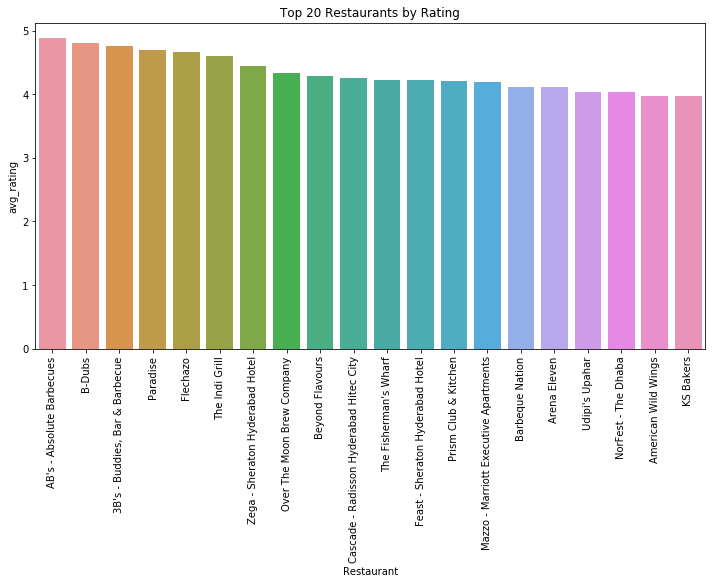

In [215]:
plt.figure(figsize=(12,6))
sns.barplot(data=by_rating[:20], x='Restaurant', y='avg_rating')
plt.title('Top 20 Restaurants by Rating')
plt.xticks(rotation='vertical')
plt.show()

# Pictures vs Avg Ratings

In [216]:
#Storing top restaurants sorted by rating
pic_ratings = df.groupby(pd.cut(df['Pictures'], np.arange(0, 65, 8)))['Rating'].mean().reset_index().sort_values(by='Pictures')
pic_ratings.columns=['Pictures','avg_rating']
pic_ratings

,Pictures,avg_rating
0,"(0, 8]",3.837891
1,"(8, 16]",4.134921
2,"(16, 24]",4.224138
3,"(24, 32]",4.545455
4,"(32, 40]",4.000000
5,"(40, 48]",4.333333
6,"(48, 56]",4.000000
7,"(56, 64]",4.000000


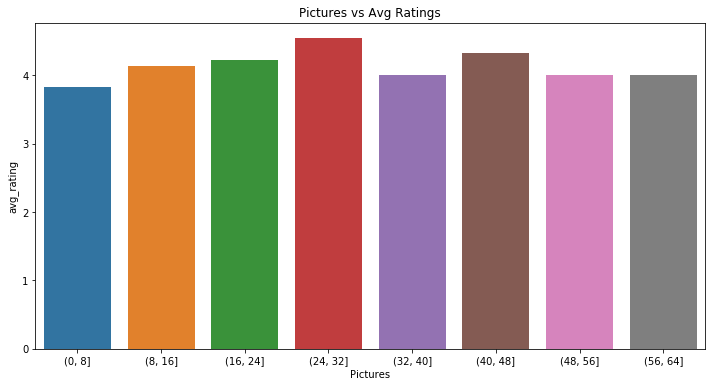

In [217]:
plt.figure(figsize=(12,6))
sns.barplot(data=pic_ratings[:20], x='Pictures', y='avg_rating')
plt.title('Pictures vs Avg Ratings')
plt.show()

# Critics Analysis

In [218]:
by_reviews = df.groupby(['Reviewer','reviews'])['Rating'].mean().reset_index().sort_values(by='reviews',ascending=False)
by_reviews.columns=['Reviewer','reviews','avg_ratings']
by_reviews.head(10)

,Reviewer,reviews,avg_ratings
812,Anvesh Chowdary,1031,3.333333
7747,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685,2.000000
80,Abc098,665,3.000000
3387,Mithun Ravindranathan,560,4.000000
3433,Mohd Zubair Ali (Hyderabad.Food.Diaries),482,4.000000
1234,Bhargava Krishna,472,3.500000
1794,Epicurean Tales,452,4.000000
4571,Raghu,443,3.416667
63,Aarti Kamath,417,4.500000
6045,Shrishail Deshnur,414,3.500000


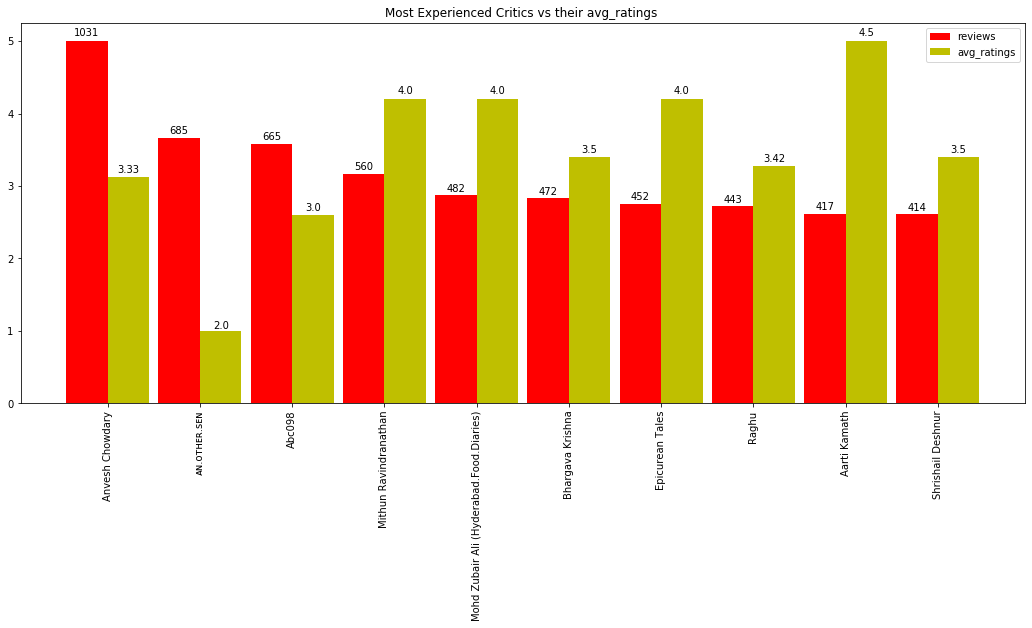

In [219]:
compare(by_reviews,'Reviewer','reviews','avg_ratings','Most Experienced Critics vs their avg_ratings ')

In [220]:
by_followers = df.groupby(['Reviewer','followers','reviews'])['Rating'].mean().reset_index().sort_values(by='followers',ascending=False)
by_followers.columns=['Reviewer','followers','reviews','avg_ratings']
by_followers.head(10)

,Reviewer,followers,reviews,avg_ratings
5769,Satwinder Singh,13410,186,3.666667
1801,Eat_vth_me,13320,60,5.000000
5521,Samar Sardar,11329,8,3.500000
1889,Foodies Hyderabad,9494,31,4.500000
6568,Srinivas,7628,34,3.750000
451,Aman Arora,7589,30,4.000000
40,ASH&B2,6931,98,3.333333
2229,Hasanthi Mula,5879,31,3.000000
0,#FOODPORN,5873,35,5.000000
1864,FooD HUNTer,5715,63,4.000000


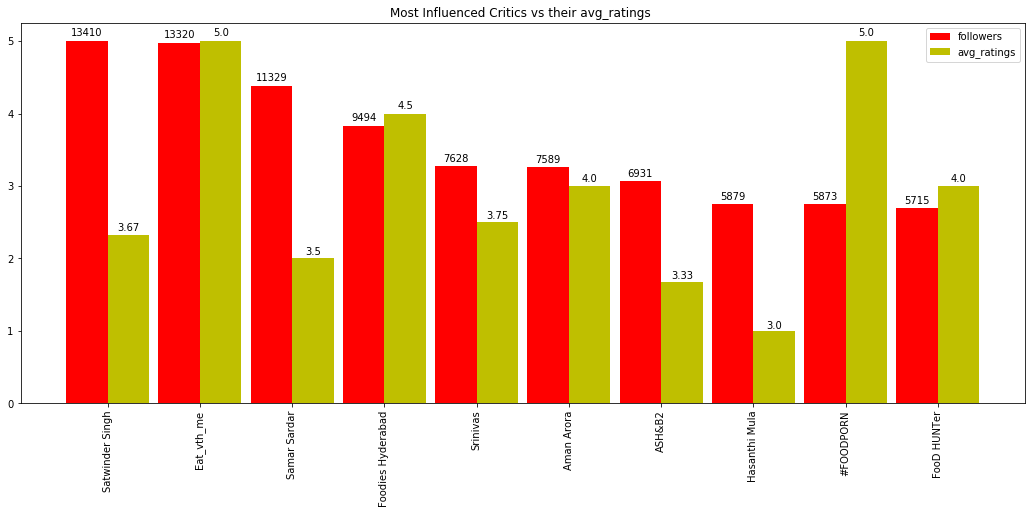

In [221]:
compare(by_followers,'Reviewer','followers','avg_ratings','Most Influenced Critics vs their avg_ratings ')

# Frequently used words

In [222]:
from sklearn.feature_extraction.text import CountVectorizer
def most_used_words(sentiment,n):
    #positive sentiment = ratings with 4,5
    #negative sentiment = ratings with 1,2
    #neutral sentiment = ratings with 3
    sentiments = {1:[4,5,'Positive '],0:[3,3.5,'Neutral '],-1:[1,2.5,'Negative ']}
    df1 = df[(df['Rating']>=sentiments[sentiment][0]) & (df['Rating']<=sentiments[sentiment][1])]
    #converts words into vectors based on count
    cv = CountVectorizer(ngram_range= (n,n))
    total_words = cv.fit_transform(df1['Review'])
    
    #Will count the total number if occurances of each word in all reviews
    count = total_words.sum(axis = 0)
    
    #storing and sorting them in a list of tuples
    freq_df = pd.DataFrame((word, count[0, idx]) for word, idx in cv.vocabulary_.items())
    freq_df.columns=[sentiments[sentiment][2]+'Words','Frequency']
    freq_df = freq_df.sort_values(by='Frequency',ascending=False)
    
    return freq_df.reset_index().drop('index',axis=1)

In [223]:
pos_df1 = most_used_words(1,1)
pos_df2 = most_used_words(1,2)
pos_df3 = most_used_words(1,3)
neu_df1 = most_used_words(0,1)
neg_df1 = most_used_words(-1,1)
neg_df2 = most_used_words(-1,2)
neg_df3 = most_used_words(-1,3)

In [224]:
from wordcloud import WordCloud

def create_cloud(data):
    word_list=list(data.iloc[:,0][:100])
    strr=''
    for i in word_list:
        strr=strr+i+' '
    wordcloud = WordCloud(width = 2400, height = 1200, 
                    background_color ='white',  
                    min_font_size = 12).generate(strr) 
    plt.figure(figsize = (24,12), facecolor = 'black') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)

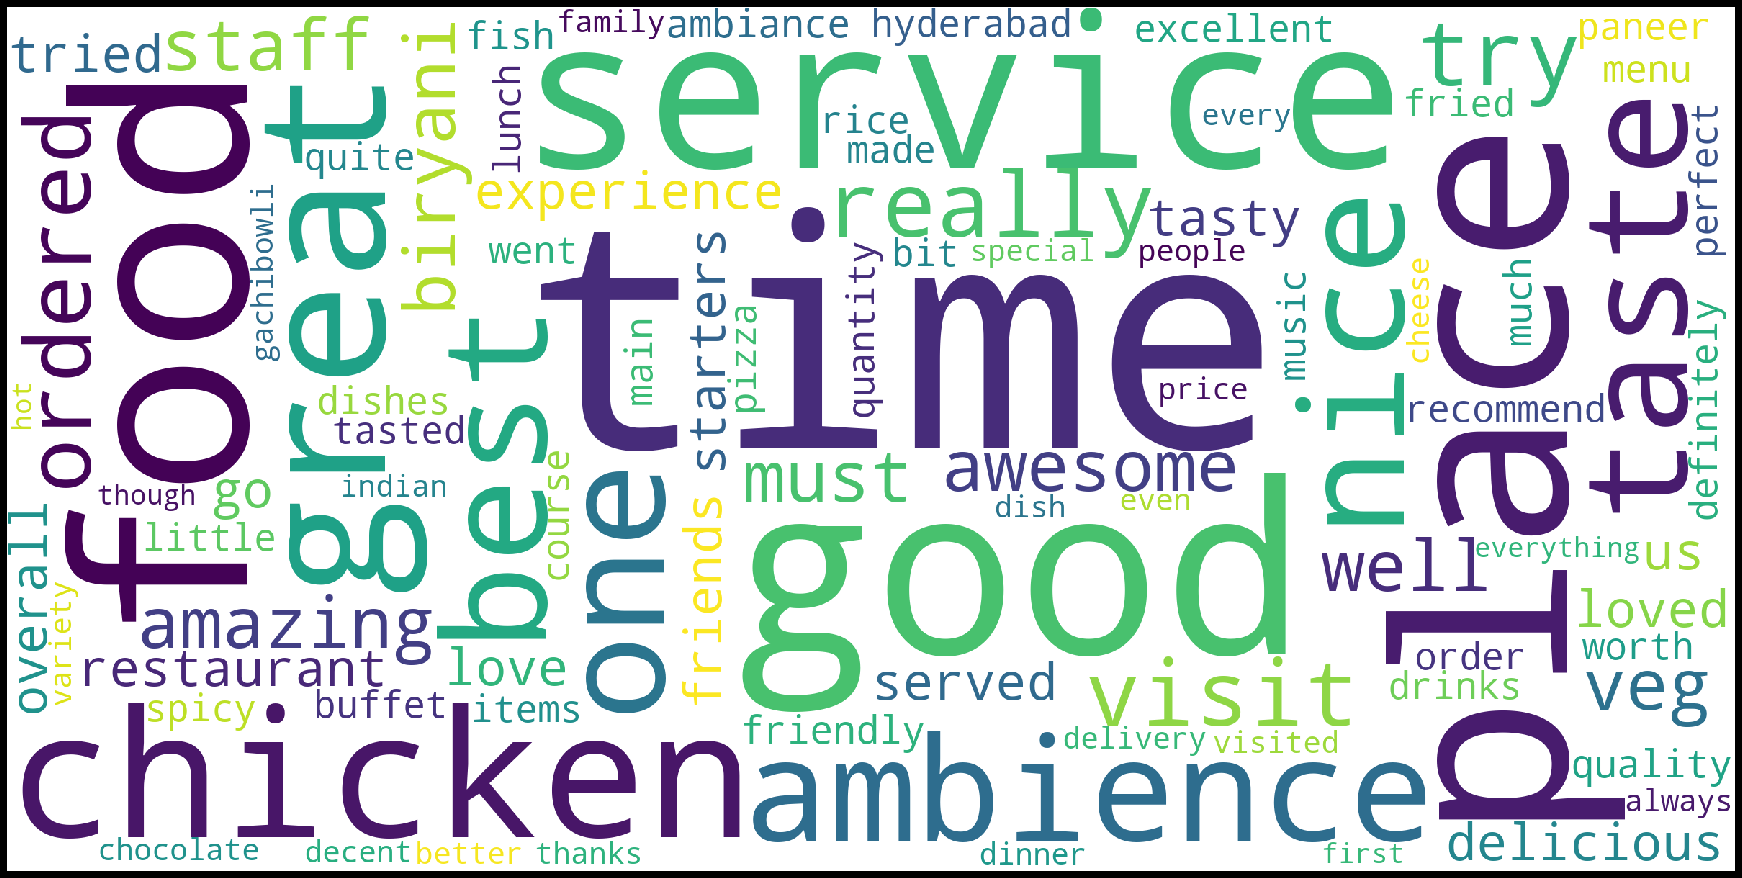

In [225]:
create_cloud(pos_df1)

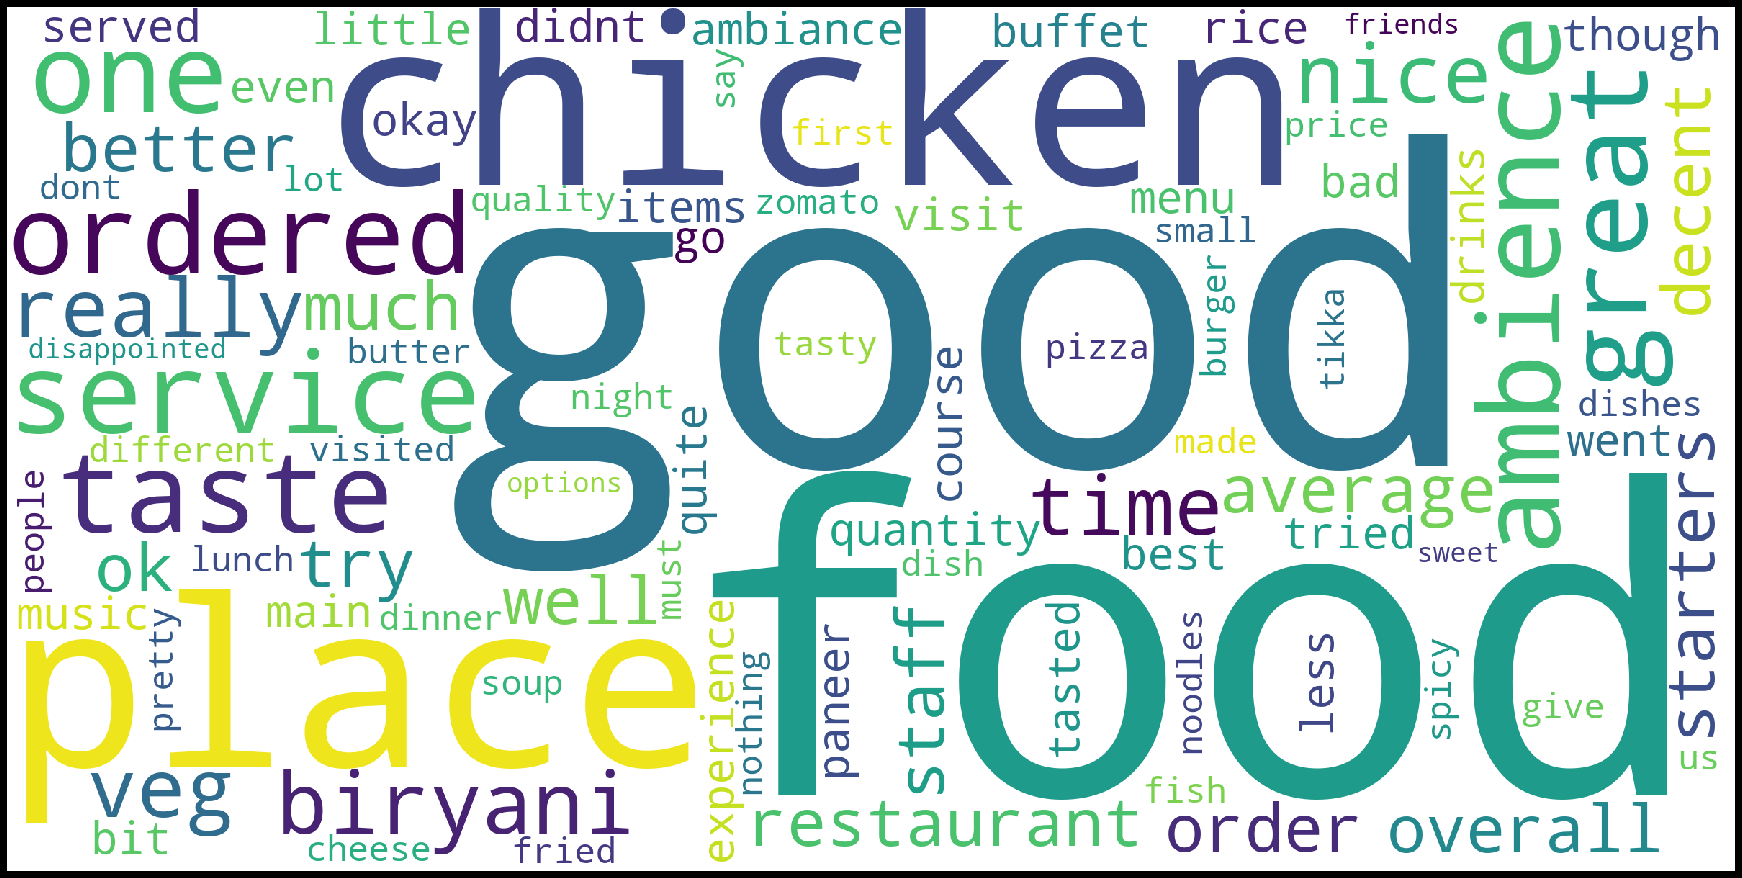

In [226]:
create_cloud(neu_df1)

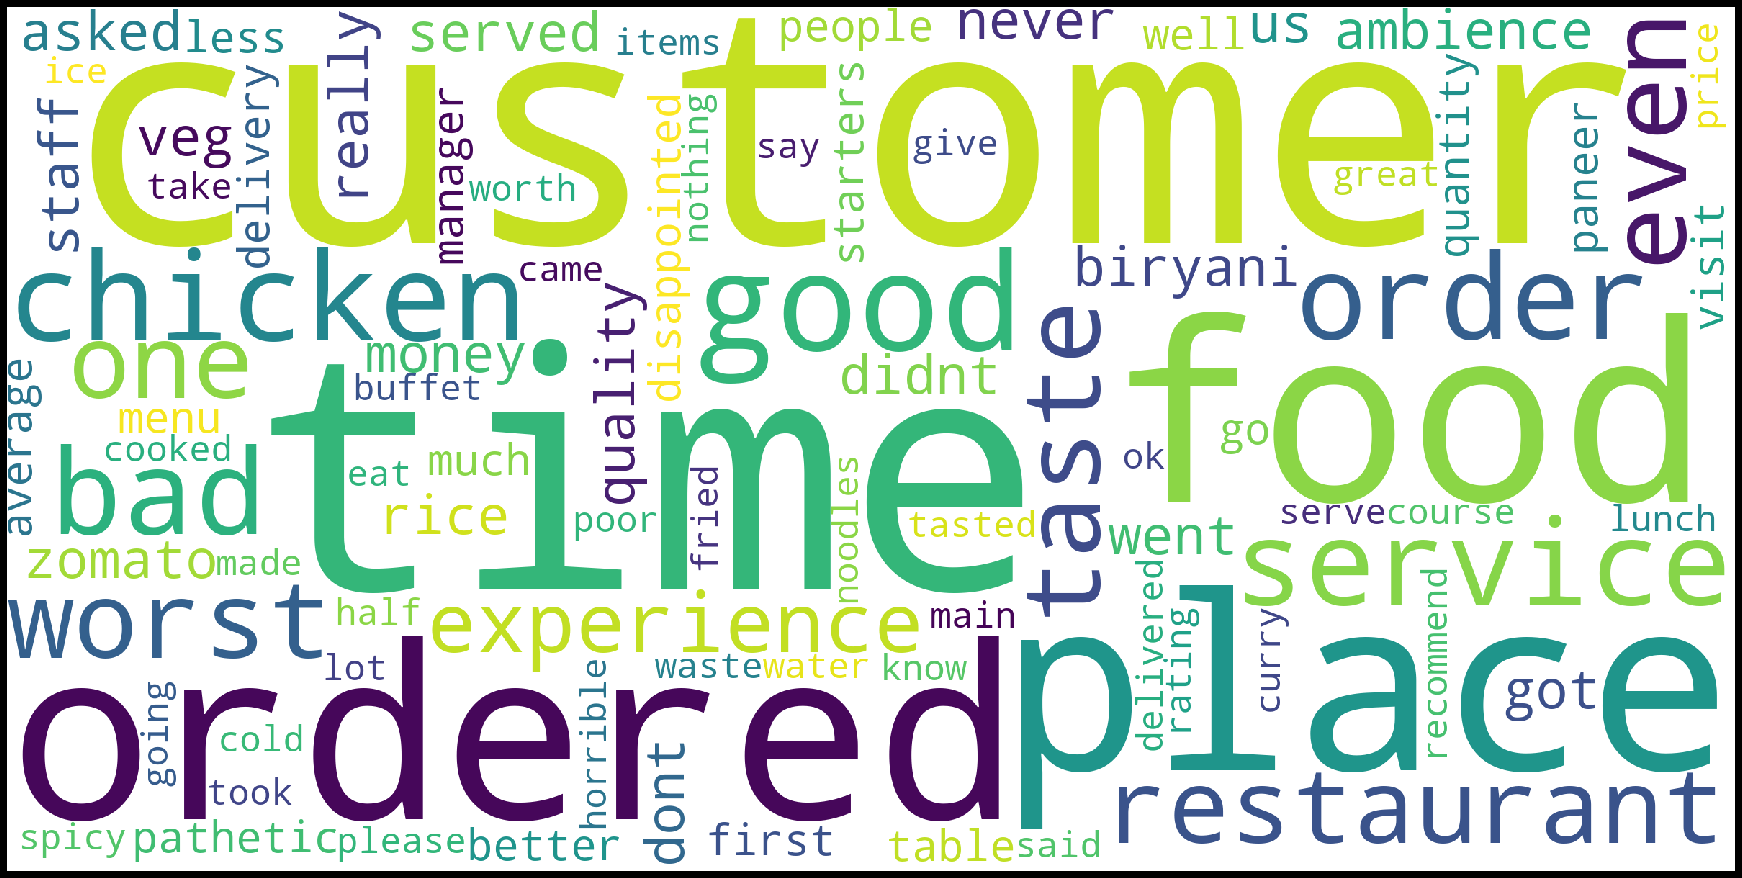

In [227]:
create_cloud(neg_df1)

In [228]:
pd.concat([neg_df1['Negative Words'][:15] ,pos_df1['Positive Words'][:15]],axis=1)

,Negative Words,Positive Words
0,not,good
1,food,food
2,place,place
3,ordered,service
4,good,chicken
5,chicken,great
6,service,ambience
7,order,taste
8,no,best
9,bad,nice


In [229]:
pd.concat([neg_df2['Negative Words'][:15] ,pos_df2['Positive Words'][:15]],axis=1)

,Negative Words,Positive Words
0,not good,must try
1,food not,good food
2,main course,really good
3,not even,food good
4,bad experience,main course
5,worst experience,good place
6,not worth,one best
7,ordered chicken,good service
8,waste money,visit place
9,ice cream,nice place


In [230]:
pd.concat([neg_df3['Negative Words'][:15] ,pos_df3['Positive Words'][:15]],axis=1)

,Negative Words,Positive Words
0,food not good,must visit place
1,taste not good,place hangout friends
2,worst experience ever,north indian food
3,also not good,veg non veg
4,not upto mark,good place hangout
5,not worth money,overall good experience
6,ordered chicken biryani,food really good
7,not cooked properly,good food good
8,would not recommend,one best places
9,not good experience,food good service
